In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

import scienceplots

# Set the style
plt.style.use(['science', 'no-latex'])

# plt.rcParams.update({
#     "font.family": "sans-serif",
#     "font.serif": ["Aptos"],  # specify font here
#     "font.size":9})          # specify font size here
# plt.rcParams['font.weight'] = 'bold'        # Axis labels and titles
# plt.rcParams['axes.labelweight'] = 'bold'   # Axis label weight
# plt.rcParams['axes.titleweight'] = 'bold'   # Title weight
# plt.rcParams['legend.fontsize'] = 'medium'  # Optional: control legend font size

In [2]:
def mean_over_seed_ppo(list_string):
    """
    Given a list of strings, this function extracts the numerical values from the strings,
    computes their mean, and returns the mean value.
    """
    # Extract numerical values from the strings
    seeds = []
    for seed in list_string:
        # Split the string by spaces and take the last part
        seeds.append([value for key, value in np.load(seed, allow_pickle=True).item().items()])
    
    # Compute the mean
    mean_value = np.mean(seeds, axis=0)
    # for each element create 5 elements
    
    return mean_value

In [3]:
def mean_over_seed_sac(list_string):
    """
    Given a list of strings, this function extracts the numerical values from the strings,
    computes their mean, and returns the mean value.
    """
    # Extract numerical values from the strings
    seeds = []
    for seed in list_string:
        seeds.append(np.load(seed, allow_pickle=True))
    
    # Compute the mean
    mean_value = np.mean(seeds, axis=0)
    
    return mean_value

In [4]:
def mean_over_seed_td3(string):
    """
    Given a list of strings, this function extracts the numerical values from the strings,
    computes their mean, and returns the mean value.
    """
    # Extract numerical values from the strings
    with open(string, 'r') as f:
        data = json.load(f)
    seeds = []
    for seed in data["eval_rewards"]:
        seeds.append([value for key, value in seed.items()])

    # Compute the mean
    mean_value = np.mean(seeds, axis=0)
    
    return mean_value

In [5]:
def mean_over_seed_dqn(string):
    """
    Given a list of strings, this function extracts the numerical values from the strings,
    computes their mean, and returns the mean value.
    """
    # Extract numerical values from the strings
    mean_value = []
    dicts = np.load(string, allow_pickle=True)
    for key, value in dicts.item().items():
        mean_value.append(value["mean"])
    # Compute the mean
    mean_value = np.array(mean_value)

    return mean_value

In [6]:
ppo_d = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1.npy', 'PPO_plots/ppo_eval_seed23_CartPole-v1.npy', 'PPO_plots/ppo_eval_seed1337_CartPole-v1.npy'])
ppo_c = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_Pendulum-v1.npy', 'PPO_plots/ppo_eval_seed42_Pendulum-v1.npy', 'PPO_plots/ppo_eval_seed345_Pendulum-v1.npy'])
td3 = mean_over_seed_td3("TD3_plots/2025-05-19 23:19:50.961987.json")
sac = mean_over_seed_sac(['SAC_plots/OPT_EXP/eval_rewards_SAC_PEND_42_STEPS_128.npy', 'SAC_plots/OPT_EXP/eval_rewards_SAC_PEND_45_STEPS_128.npy', 'SAC_plots/OPT_EXP/eval_rewards_SAC_PEND_48_STEPS_128.npy'])
dqn_e_99_t_005 = mean_over_seed_dqn('DQN_plots/avg_eval_rewards_eps_decay=0.99 (1).npy')

dqn_e_995_t_005 = mean_over_seed_dqn('DQN_plots/avg_eval_rewards_eps_decay=0.995 (1).npy')
dqn_e_999_t_005 = mean_over_seed_dqn('DQN_plots/avg_eval_rewards_eps_decay=0.999 (1).npy')

dqn_e_99_t_0 = mean_over_seed_dqn('DQN_plots/avg_eval_rewards_eps_decay=0.99_tau0.npy')
dqn_e_99_t_1 = mean_over_seed_dqn('DQN_plots/avg_eval_rewards_eps_decay=0.99 (2).npy')

sac_alpha_001 = mean_over_seed_sac(['SAC_plots/ALPHA/eval_rewards_SAC_PEND_48_ALPHA_0P01.npy'])
sac_alpha_2 = mean_over_seed_sac(['SAC_plots/ALPHA/eval_rewards_SAC_PEND_48_ALPHA_2.npy'])

sac_batch_32 = mean_over_seed_sac(['SAC_plots/BATCH/eval_rewards_SAC_PEND_48_BATCH_32.npy'])
sac_batch_256 = mean_over_seed_sac(['SAC_plots/BATCH/eval_rewards_SAC_PEND_48_BATCH_256.npy'])

sac_rscale_01 = mean_over_seed_sac(['SAC_plots/RSCALE/eval_rewards_SAC_PEND_48_RSCALE_0P1.npy'])
sac_rscale_10 = mean_over_seed_sac(['SAC_plots/RSCALE/eval_rewards_SAC_PEND_48_RSCALE_10.npy'])

sac_steps_300 = mean_over_seed_sac(['SAC_plots/STEPS/eval_rewards_SAC_PEND_48_STEPS_300.npy'])
sac_steps_512 = mean_over_seed_sac(['SAC_plots/STEPS/eval_rewards_SAC_PEND_48_STEPS_512.npy'])

ppo_batch_256 = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1_batch_256.npy',
                                    'PPO_plots/ppo_eval_seed23_CartPole-v1_batch_256.npy',
                                    'PPO_plots/ppo_eval_seed1337_CartPole-v1_batch_256.npy'])
ppo_batch_1024 = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1_batch_1024.npy',
                                    'PPO_plots/ppo_eval_seed23_CartPole-v1_batch_1024.npy',
                                    'PPO_plots/ppo_eval_seed1337_CartPole-v1_batch_1024.npy'])

ppo_ent_0001 = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1_ent_0pt001.npy',
                                    'PPO_plots/ppo_eval_seed23_CartPole-v1_ent_0pt001.npy',
                                    'PPO_plots/ppo_eval_seed1337_CartPole-v1_ent_0pt001.npy'])
ppo_ent_005 = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1_ent_0pt05.npy',
                                    'PPO_plots/ppo_eval_seed23_CartPole-v1_ent_0pt05.npy',
                                    'PPO_plots/ppo_eval_seed1337_CartPole-v1_ent_0pt05.npy'])
ppo_steps_1024 = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1_step_1024.npy',
                                    'PPO_plots/ppo_eval_seed23_CartPole-v1_step_1024.npy',
                                    'PPO_plots/ppo_eval_seed1337_CartPole-v1_step_1024.npy'])
ppo_steps_2048 = mean_over_seed_ppo(['PPO_plots/ppo_eval_seed0_CartPole-v1_step_2048.npy',
                                    'PPO_plots/ppo_eval_seed23_CartPole-v1_step_2048.npy',
                                    'PPO_plots/ppo_eval_seed1337_CartPole-v1_step_2048.npy'])

discrete = {
    'PPO': ppo_d,
    'DQN': dqn_e_99_t_005[:180],
}

continuous = {
    'PPO': ppo_c,
    'TD3': td3,
    'SAC': sac,
}

dqn_tau = {
    'DQN ($\\tau=0.05$)': dqn_e_99_t_005,
    'DQN ($\\tau=1$)': dqn_e_99_t_1,
    'DQN ($\\tau=0$)': dqn_e_99_t_0,
}

dqn_epsilon = {
    'DQN ($\\epsilon=0.99$)': dqn_e_99_t_005,
    'DQN ($\\epsilon=0.995$)': dqn_e_995_t_005,
    'DQN ($\\epsilon=0.999$)': dqn_e_999_t_005[:160],
}


sac_alpha = {
    'SAC ($\\alpha=0.3$)': sac,
    'SAC ($\\alpha=0.01$)': sac_alpha_001,
    'SAC ($\\alpha=2$)': sac_alpha_2,
}

sac_batch = {
    'SAC (batch size 64)': sac,
    'SAC (batch size 256)': sac_batch_256,
    'SAC (batch size 32)': sac_batch_32,
}

sac_rscale = {
    'SAC ($r_{scale}=3$)': sac,
    'SAC ($r_{scale}=10$)': sac_rscale_10,
    'SAC ($r_{scale}=0.1$)': sac_rscale_01,
}

sac_steps = {
    'SAC (steps 128)': sac,
    'SAC (steps 300)': sac_steps_300,
    'SAC (steps 512)': sac_steps_512,
}
    
ppo_batch = {
    'PPO (batch size 512)': ppo_d,
    'PPO (batch size 256)': ppo_batch_256,
    'PPO (batch size 1024)': ppo_batch_1024,
}

ppo_ent = {
    'PPO (entropy 0.01)': ppo_d,
    'PPO (entropy 0.05)': ppo_ent_005,
    'PPO (entropy 0.001)': ppo_ent_0001,
}

ppo_steps = {
    'PPO (steps 4096)': ppo_d,
    'PPO (steps 2048)': ppo_steps_2048,
    'PPO (steps 1024)': ppo_steps_1024,
}


In [7]:
last_episodes = sac[-15:]
print(np.mean(last_episodes))
print(np.std(last_episodes))

-157.345501489838
34.631126737696775


In [8]:
# function to plot
def plot(dicts, env_name, window_size):
    plt.figure(figsize=(5, 4), dpi=200)
    # Compute moving average
    for key, value in dicts.items():
        smoothed_rewards = np.convolve(value, np.ones(window_size)/window_size, mode='valid')
        episodes = np.arange(len(smoothed_rewards))*5*200
        # use specific color
        # if key == 'PPO':
        #     color = 'tab:blue'
        # elif key == 'DQN':
        #     color = 'tab:orange'
        # elif key == 'TD3':
        #     color = 'tab:green'
        # elif key == 'SAC':
        #     color = 'tab:red'
        # else:
        #     color = 'tab:purple'
        
        plt.plot(episodes, smoothed_rewards, label=key)
        # plt.plot(episodes, smoothed_rewards, label=key, color=color)
        # add standard deviation arround the mean average
        std_moving = np.array([np.std(value[i:i+window_size]) for i in range(len(value) - window_size + 1)])
        # plt.fill_between(episodes, smoothed_rewards - std_moving, smoothed_rewards + std_moving, alpha=0.2, color=color)
        plt.fill_between(episodes, smoothed_rewards - std_moving, smoothed_rewards + std_moving, alpha=0.2)
    

    plt.xlabel("Timestep")
    plt.ylabel(f"Mean Eval. Reward ($\\pm\\sigma$), Smoothed (Window = {window_size} ep.)")
    # plt.ylabel(f"Smoothed Evaluation Reward (Window = {window_size}) ")
    plt.title(f"Eval. reward vs. timestep on {env_name} (3 seeds avg.)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("output_graphs/"+ env_name + ".svg", format='svg')
    plt.show()


In [9]:
def plot_hyperparameters(dicts, env_name, window_size, title):
    plt.figure(figsize=(5, 4), dpi=200)
    # Compute moving average
    prefix = ""
    for key, value in dicts.items():
        smoothed_rewards = np.convolve(value, np.ones(window_size)/window_size, mode='valid')
        episodes = np.arange(len(smoothed_rewards))*5*200
        # use specific color
        prefix = key[:3]
        # if key == 'PPO':
        #     color = 'tab:blue'
        # elif key == 'DQN':
        #     color = 'tab:orange'
        # elif key == 'TD3':
        #     color = 'tab:green'
        # elif key == 'SAC':
        #     color = 'tab:red'
        # else:
        #     color = 'tab:purple'
        
        plt.plot(episodes, smoothed_rewards, label=key)
        # plt.plot(episodes, smoothed_rewards, label=key, color=color)
        # add standard deviation arround the mean average
        std_moving = np.array([np.std(value[i:i+window_size]) for i in range(len(value) - window_size + 1)])
        # plt.fill_between(episodes, smoothed_rewards - std_moving, smoothed_rewards + std_moving, alpha=0.2, color=color)
        plt.fill_between(episodes, smoothed_rewards - std_moving, smoothed_rewards + std_moving, alpha=0.2)
    

    plt.xlabel("Timestep")
    plt.ylabel(f"Mean Eval. Reward ($\\pm\\sigma$), Smoothed (Window = {window_size} ep.)")
    plt.title(f"Eval. reward vs. timestep on {env_name} (3 seeds avg.) for {prefix}")
    # if title != "":
    #     plt.title(f"Eval. reward vs. timestep on {env_name} (3 seeds avg.) with $\\{title}$")
    # else:
    #     plt.title(f"Eval. reward vs. timestep on {env_name} (3 seeds avg.)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("output_graphs/"+ prefix + "_" + title +  "_hyperparameter.svg", format='svg')
    plt.show()

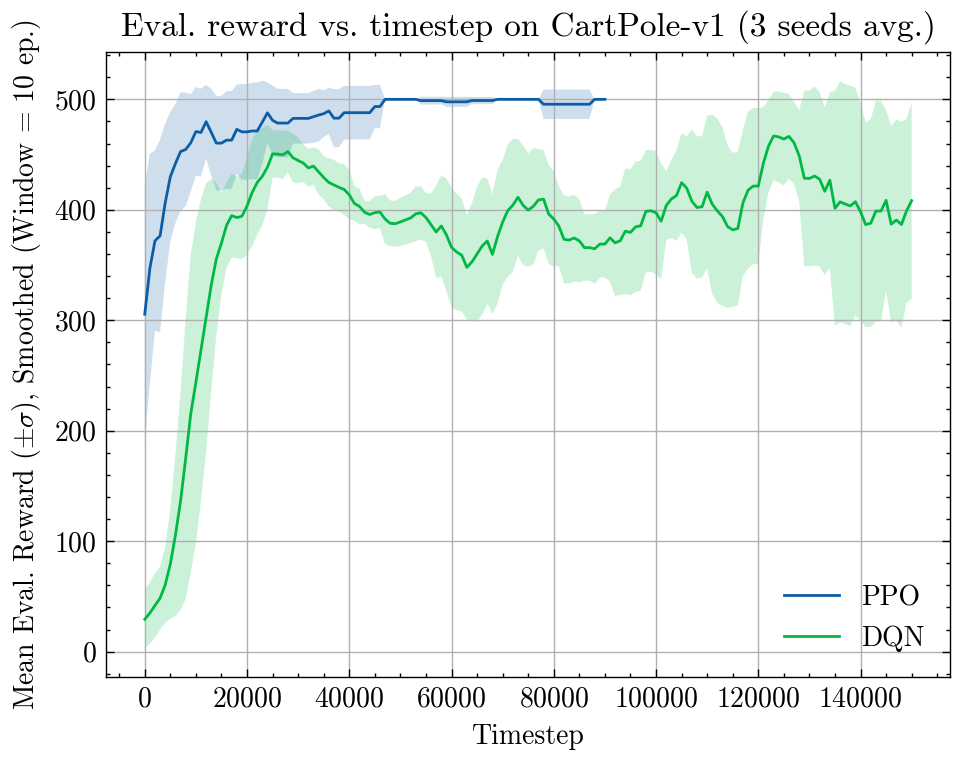

In [10]:
plot(discrete, "CartPole-v1", 10)

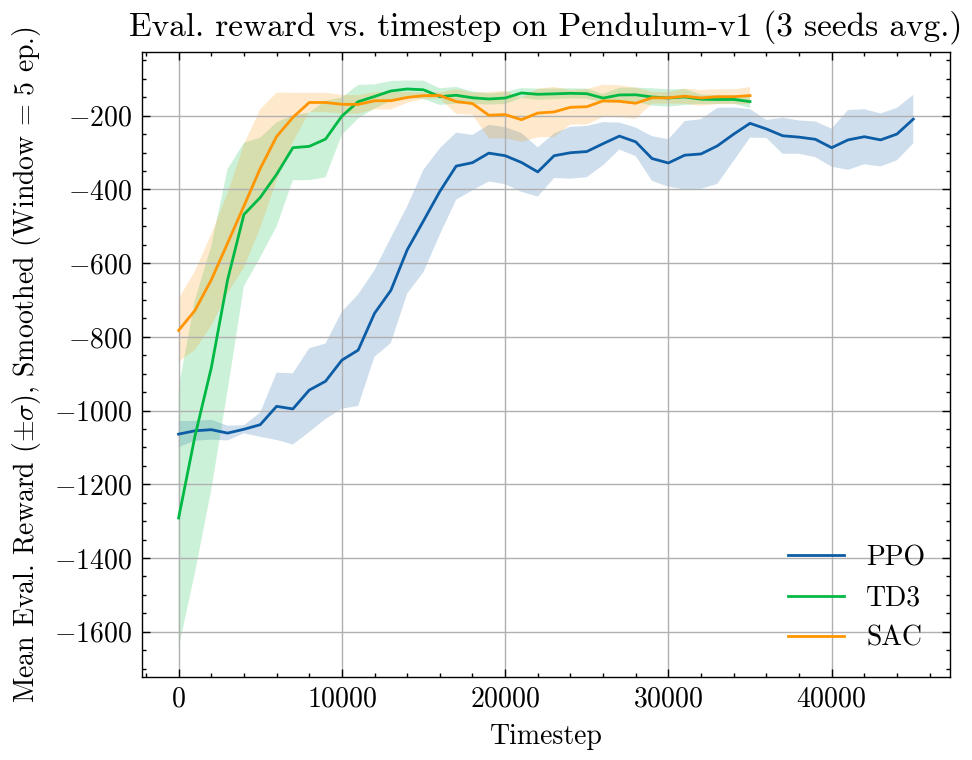

In [11]:
plot(continuous, "Pendulum-v1", 5)

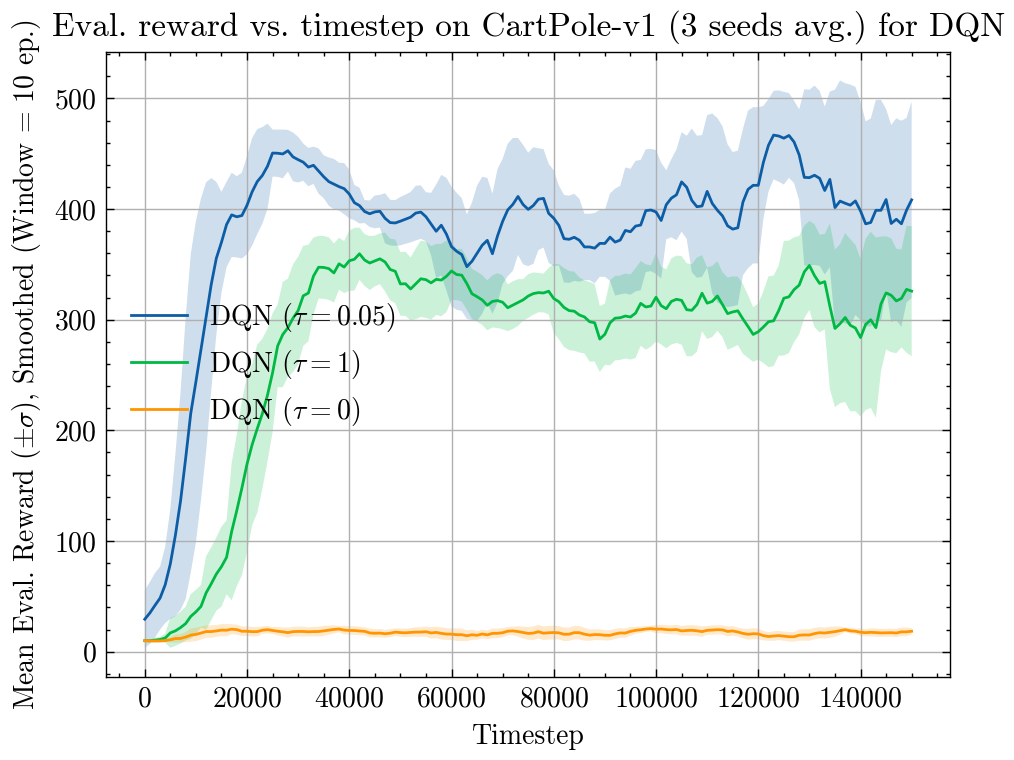

In [12]:
plot_hyperparameters(dqn_tau, "CartPole-v1", 10, "tau")

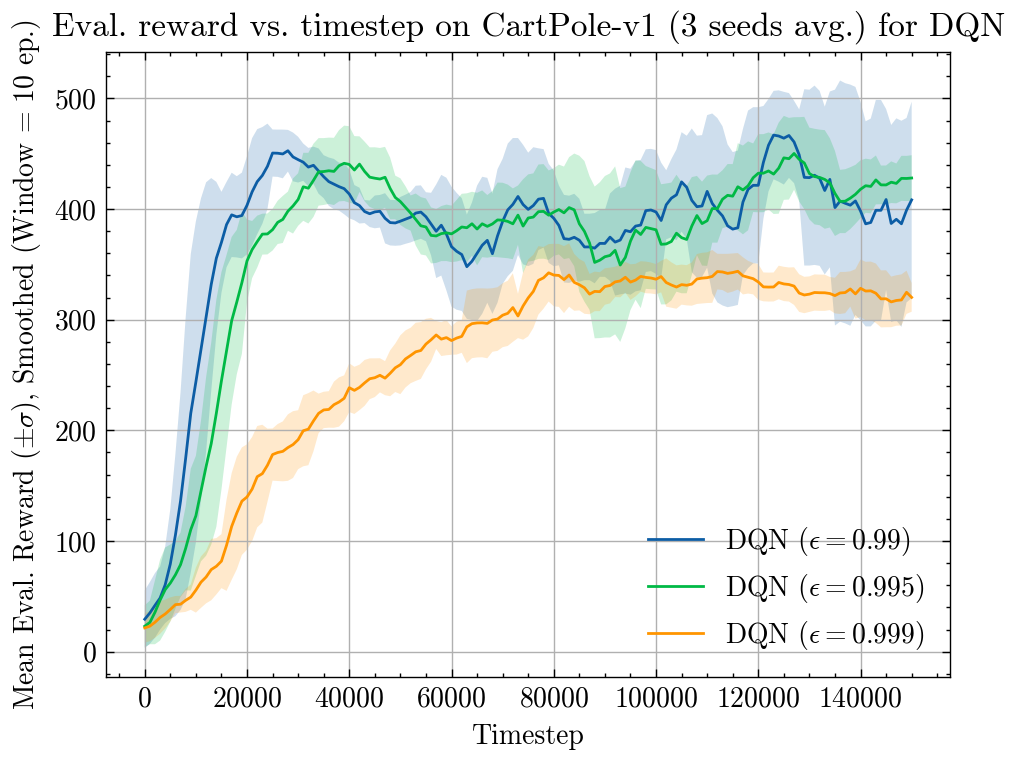

In [13]:
plot_hyperparameters(dqn_epsilon, "CartPole-v1", 10, "epsilon")

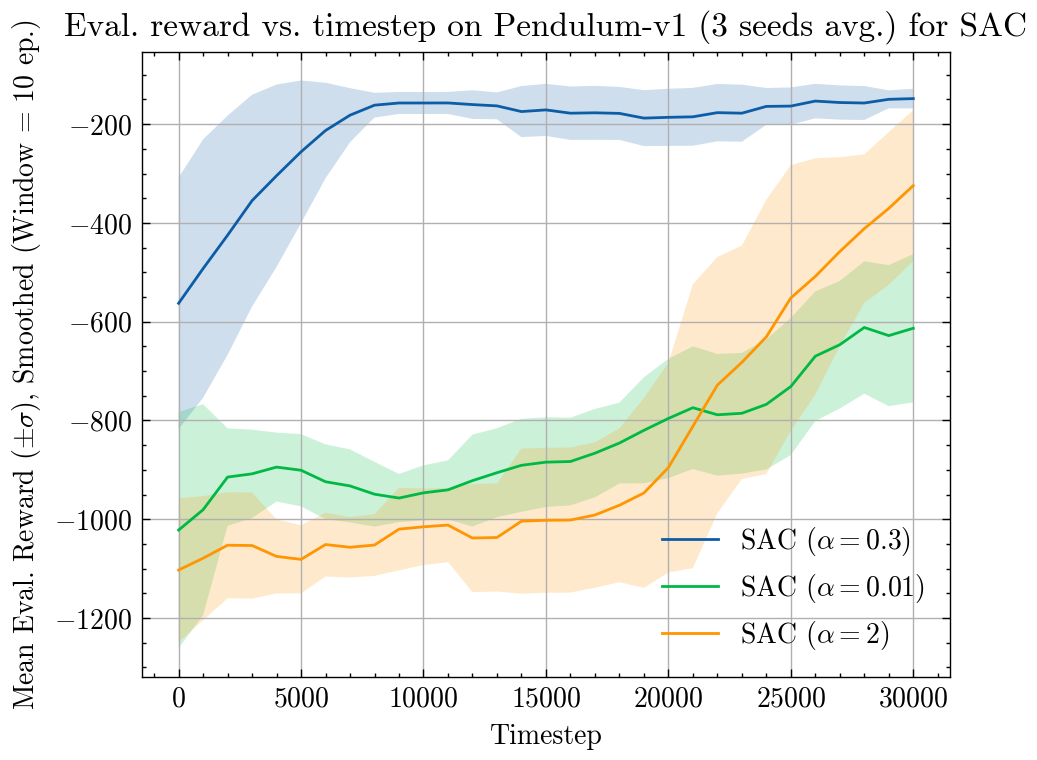

In [14]:
plot_hyperparameters(sac_alpha, "Pendulum-v1", 10, "alpha")

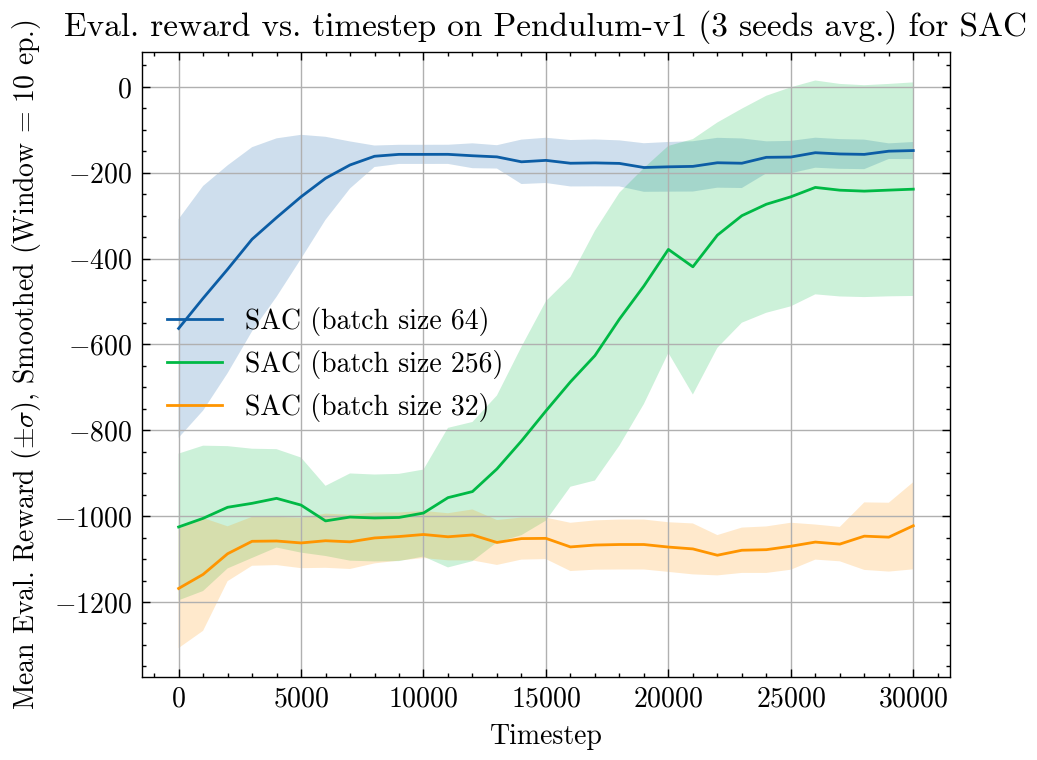

In [15]:
plot_hyperparameters(sac_batch, "Pendulum-v1", 10, "batch")

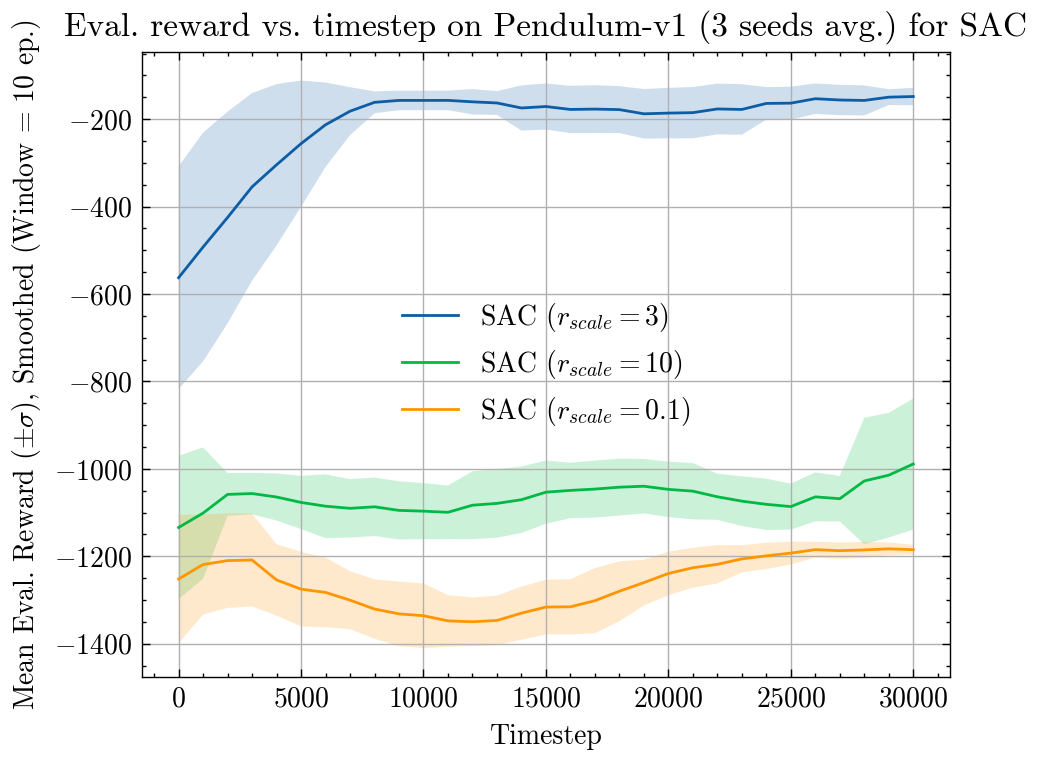

In [16]:
plot_hyperparameters(sac_rscale, "Pendulum-v1", 10, "rscale")

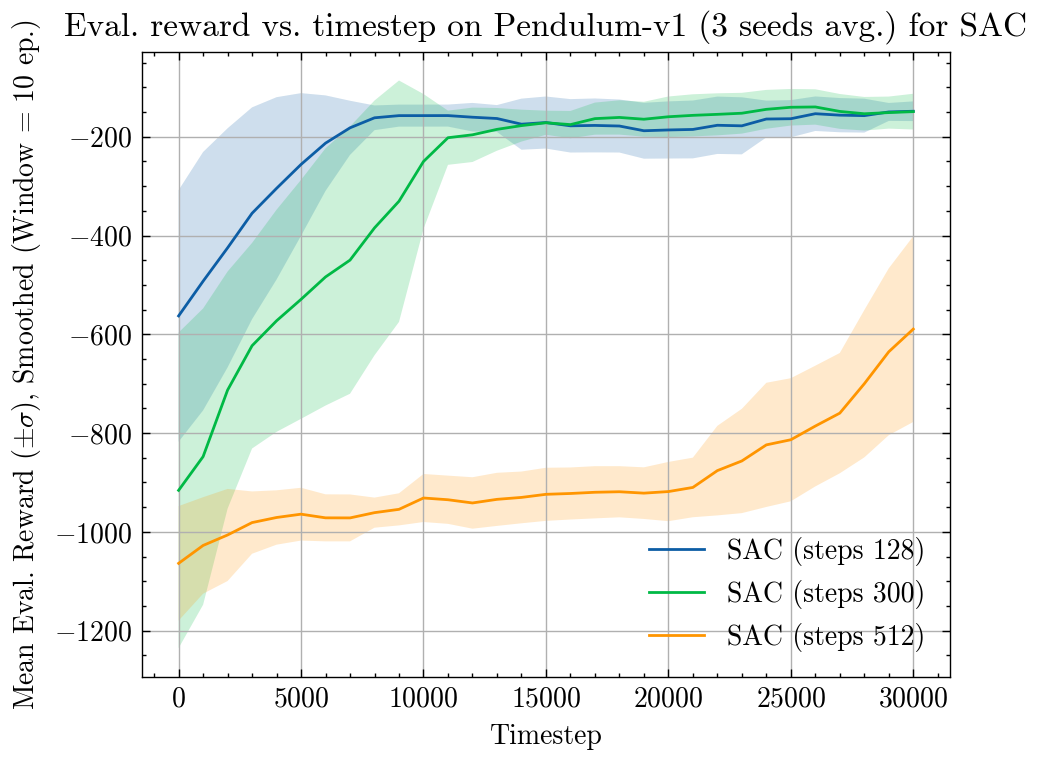

In [17]:
plot_hyperparameters(sac_steps, "Pendulum-v1", 10, "steps")

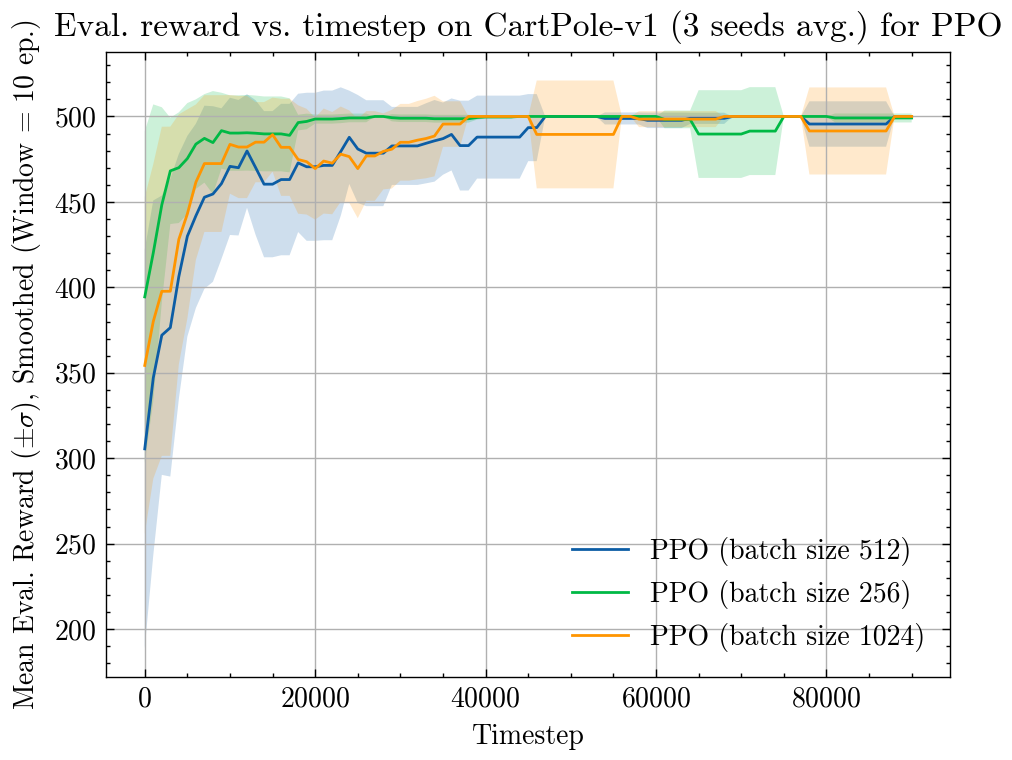

In [18]:
plot_hyperparameters(ppo_batch, "CartPole-v1", 10, "batch")

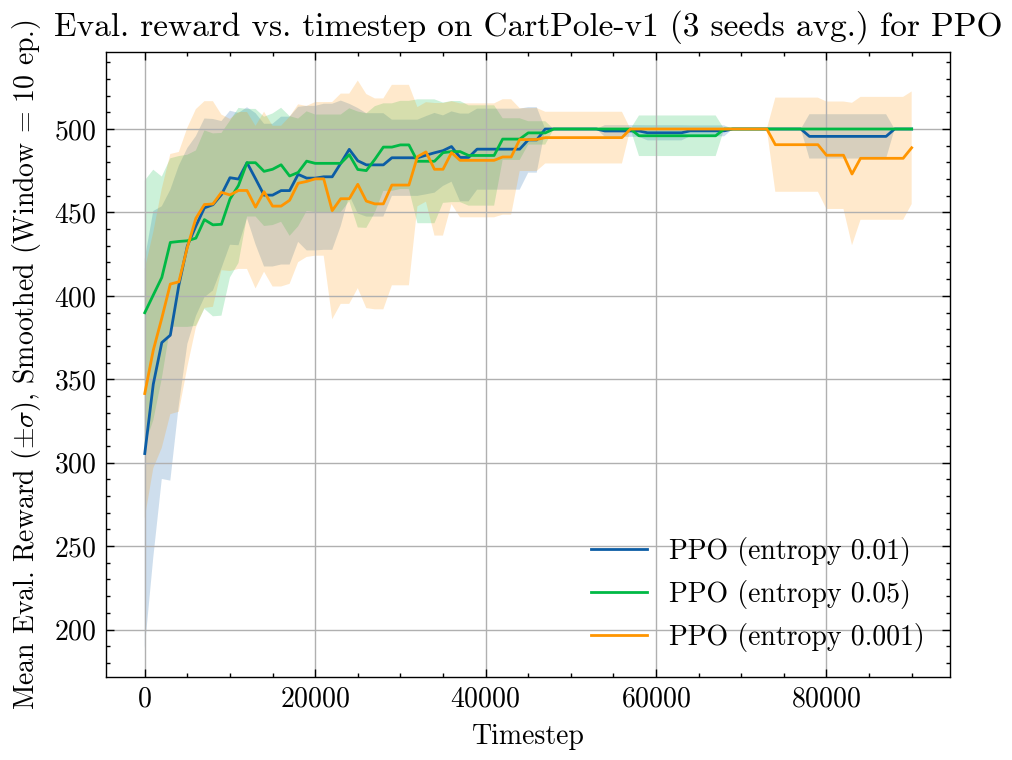

In [19]:
plot_hyperparameters(ppo_ent, "CartPole-v1", 10, "entropy")

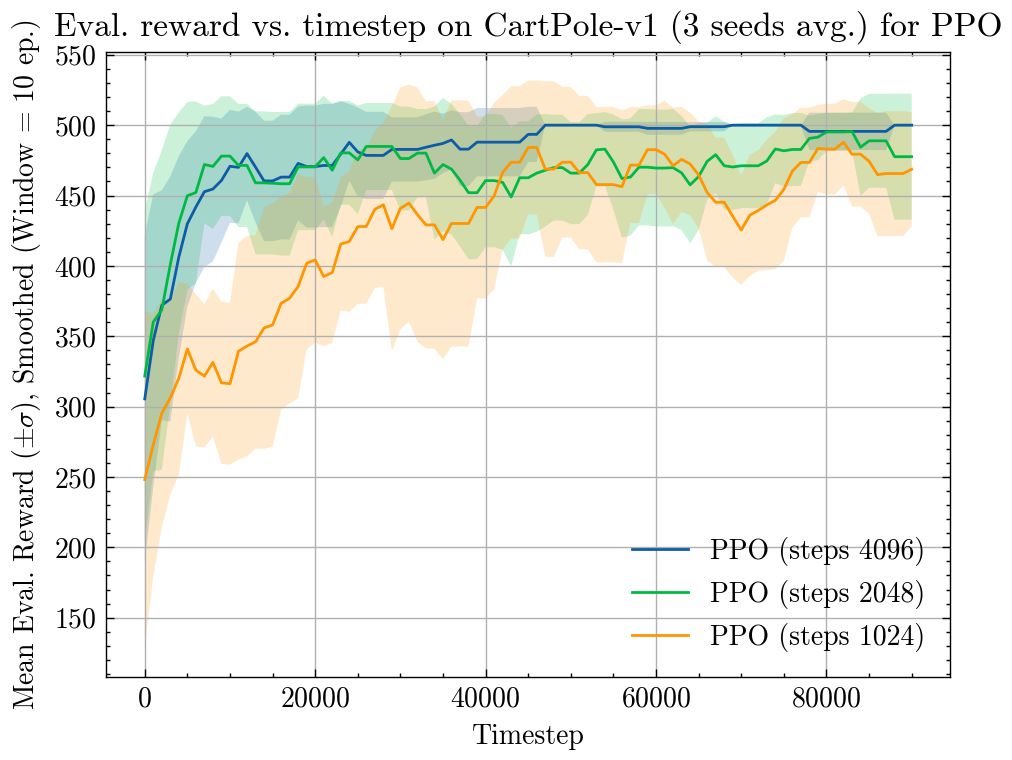

In [20]:
plot_hyperparameters(ppo_steps, "CartPole-v1", 10, "steps")